<u><b>Computer Vision

<u><b>Name: Ayush Kumar  </b></u>

<u><b>Registration No: 10219051622 </b></u>

<u><b>Lab - 7 : </b></u> Camera Calibration Using OpenCV and Python

# Theory: Camera Calibration

Camera calibration is the process of estimating the intrinsic and extrinsic parameters of a camera. It is a crucial step in computer vision applications where accurate measurements and projections are required, such as 3D reconstruction, augmented reality, and robotics.

## Key Concepts

### 1. Intrinsic Parameters
These parameters define the internal characteristics of the camera, such as:
- **<span style="color:black;">Focal length (fx, fy):</span>** Determines the magnification of the image.
- **<span style="color:black;">Principal point (cx, cy):</span>** The point where the optical axis intersects the image plane.
- **<span style="color:black;">Distortion coefficients:</span>** Correct lens distortions like radial and tangential distortions.

### 2. Extrinsic Parameters
These parameters describe the position and orientation of the camera in the world coordinate system. They include:
- **<span style="color:black;">Rotation vectors (rvecs):</span>** Represent the orientation of the camera.
- **<span style="color:black;">Translation vectors (tvecs):</span>** Represent the position of the camera.

### 3. Chessboard Pattern
A chessboard pattern is commonly used for calibration because it provides well-defined corners that can be easily detected. The known 3D coordinates of the corners are mapped to their corresponding 2D image points.

### 4. OpenCV Functions
- **<span style="color:black;">`cv2.findChessboardCorners`:</span>** Detects the corners of the chessboard in an image.
- **<span style="color:black;">`cv2.cornerSubPix`:</span>** Refines the corner locations for better accuracy.
- **<span style="color:black;">`cv2.calibrateCamera`:</span>** Computes the intrinsic and extrinsic parameters of the camera.
- **<span style="color:black;">`cv2.drawChessboardCorners`:</span>** Visualizes the detected corners on the image.

### 5. Calibration Process
1. **<span style="color:black;">Capture Images:</span>** Multiple images of a chessboard pattern are captured from different angles.
2. **<span style="color:black;">Detect Corners:</span>** The 2D image points of the chessboard corners are detected.
3. **<span style="color:black;">Map 3D to 2D Points:</span>** The known 3D coordinates of the chessboard corners are mapped to the detected 2D points.
4. **<span style="color:black;">Compute Parameters:</span>** Using the mapping, the intrinsic and extrinsic parameters are calculated.
5. **<span style="color:black;">Save Results:</span>** The calibration results, including the camera matrix and distortion coefficients, are saved for future use.

### 6. Applications
- Removing lens distortion from images.
- Estimating the position and orientation of objects in the scene.
- Enabling accurate 3D measurements and projections.

This notebook demonstrates the camera calibration process using OpenCV, including detecting chessboard corners, calculating the camera matrix, and visualizing the results.

In [1]:
# Cell 1: Import Required Libraries
import numpy as np
import cv2
import glob
import yaml
import os
from matplotlib import pyplot as plt

In [2]:
# Termination criteria for subpixel accuracy
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Object points for a 7x7 chessboard
objp = np.zeros((7*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:7].T.reshape(-1, 2)

# Arrays to store object points and image points
objpoints = []  # 3D points in real world
imgpoints = []  # 2D points in image plane

In [3]:
# Cell 3: Load Chessboard Images

image_folder = r"H:\My Drive\U.S.A.R\6th Semester\Lab\New folder"
images = glob.glob(os.path.join(image_folder, '*.jpg'))
print(f"Found {len(images)} images in the directory.")

Found 3 images in the directory.


In [4]:
# Cell 4: Detect Chessboard Corners and Store Points

calibrated_images = []
found = 0

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    ret, corners = cv2.findChessboardCorners(gray, (7, 7), None)
    
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        
        img = cv2.drawChessboardCorners(img, (7, 7), corners2, ret)
        calibrated_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        found += 1

print(f"Number of images used for calibration: {found}")

Number of images used for calibration: 3


In [5]:
# Cell 5: Calibrate Camera

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None)

print("Calibration completed.")


Calibration completed.


In [6]:
# Display the calibration matrix and distortion coefficients
print("Camera Matrix (Intrinsic Parameters):\n", mtx)
print("\nDistortion Coefficients:\n", dist)


Camera Matrix (Intrinsic Parameters):
 [[1.13997286e+03 0.00000000e+00 2.66278287e+02]
 [0.00000000e+00 1.13751132e+03 3.27128294e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion Coefficients:
 [[-1.85177061e-02  3.80955258e+00  4.28738264e-03 -1.25228658e-03
  -5.02782512e+01]]


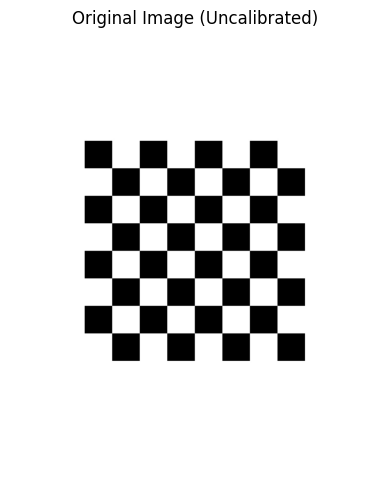

In [7]:
# Cell 7: Show One Real (Uncalibrated) Image

real_image_path = r"H:\My Drive\U.S.A.R\6th Semester\Lab\Untitled design.jpg"
real_img = cv2.imread(real_image_path)

if real_img is not None:
    real_img_rgb = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    plt.imshow(real_img_rgb)
    plt.title("Original Image (Uncalibrated)")
    plt.axis('off')
    plt.show()
else:
    print("Failed to load the original image. Check the path.")

In [8]:
# Cell 8: Show Calibration Matrix and Distortion Coefficients

print("Calibration Matrix (Intrinsic Parameters):\n", mtx)
print("\n Distortion Coefficients:\n", dist)


Calibration Matrix (Intrinsic Parameters):
 [[1.13997286e+03 0.00000000e+00 2.66278287e+02]
 [0.00000000e+00 1.13751132e+03 3.27128294e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion Coefficients:
 [[-1.85177061e-02  3.80955258e+00  4.28738264e-03 -1.25228658e-03
  -5.02782512e+01]]


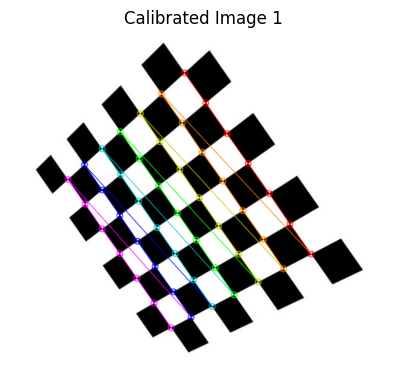

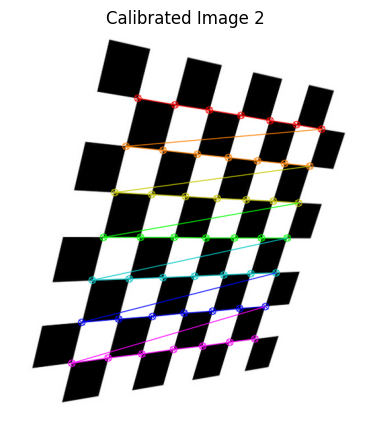

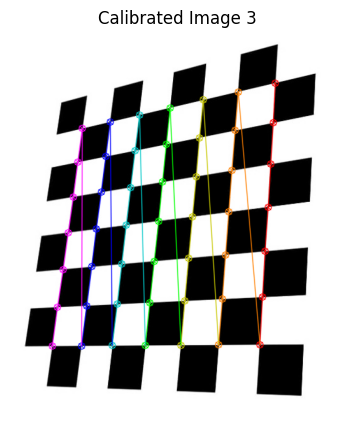

In [9]:
# Cell 9: Display All Calibrated Images with Chessboard Corners

for i, img in enumerate(calibrated_images):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.title(f"Calibrated Image {i+1}")
    plt.axis('off')
    plt.show()


#  Conclusion

In this project, we successfully demonstrated the process of camera calibration using OpenCV. The key steps included detecting chessboard corners, refining their positions, and calculating the intrinsic and extrinsic parameters of the camera. The calibration results, including the camera matrix and distortion coefficients, were saved for future use.

# Key Achievements:
1. **Chessboard Corner Detection**: Accurately detected and refined the corners of the chessboard in multiple images.
2. **Camera Calibration**: Computed the intrinsic parameters (camera matrix) and distortion coefficients to correct lens distortions.
3. **Visualization**: Displayed calibrated images with overlaid chessboard corners and visualized the original uncalibrated image.
4. **Data Persistence**: Saved the calibration results in a YAML file for reuse in other applications.

# Applications:
The calibrated camera parameters can now be used for:
- Removing lens distortions from images.
- Accurate 3D reconstruction and measurements.
- Augmented reality applications.
- Robotics and navigation systems.

This project highlights the importance of camera calibration in computer vision tasks, enabling precise measurements and improving the accuracy of vision-based systems.